# Usage of CPU Cores

While the code below is running, the script pandas_cpu_dense.py is executed to measure its CPU usage.

In [11]:
import psutil
values = []
for x in range(50):
    values.append(psutil.cpu_percent(interval=0.5, percpu=True))
for value in values:
    print(value)
    print('')

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.9, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.9, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

[2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

[2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.9, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0]

[2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 2.0]

[2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 2.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.9, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 2.0, 0.0, 0.0, 0.0, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

[2.0, 2.0, 0.0, 2.0, 0.0, 2.

How many cores is used?

In [12]:
used_cores = []
for row in values:
    usage = 0
    for value in row:
        if value > 0:
            usage += 1
    used_cores.append(usage)
used_cores

[2,
 3,
 4,
 3,
 5,
 4,
 16,
 32,
 4,
 2,
 6,
 3,
 2,
 3,
 4,
 4,
 7,
 3,
 4,
 6,
 7,
 3,
 3,
 4,
 4,
 3,
 6,
 1,
 5,
 6,
 5,
 3,
 5,
 2,
 5,
 4,
 5,
 3,
 4,
 2,
 6,
 7,
 4,
 2,
 5,
 4,
 4,
 5,
 3,
 0]

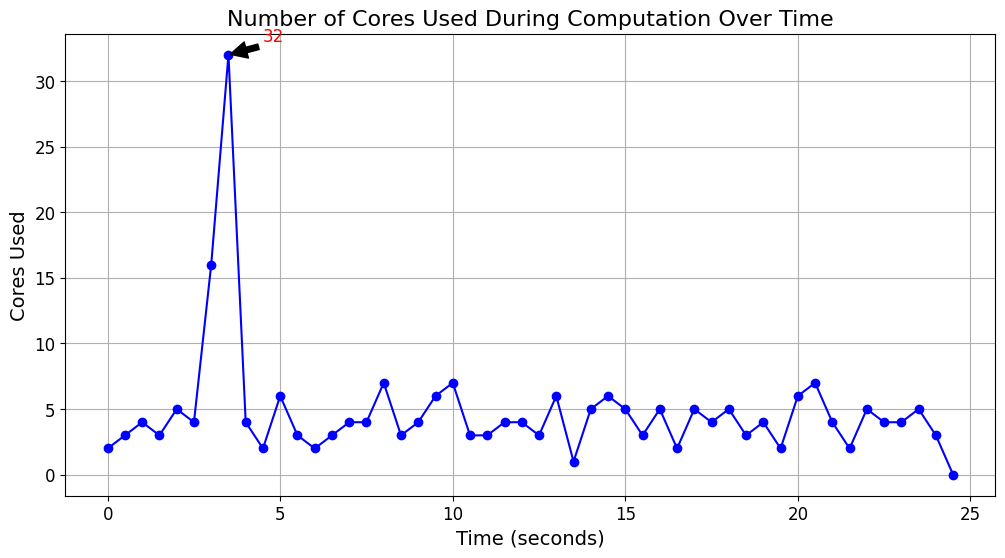

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a time series based on the sample rate (each half second)
time = [i * 0.5 for i in range(len(used_cores))]

# Create a DataFrame
df = pd.DataFrame({'Time (s)': time, 'Cores Used': used_cores})

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df['Time (s)'], df['Cores Used'], marker='o', linestyle='-', color='b')
plt.xlabel('Time (seconds)', fontsize=14)
plt.ylabel('Cores Used', fontsize=14)
plt.title('Number of Cores Used During Computation Over Time', fontsize=16)
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Annotate peaks
max_cores = df['Cores Used'].max()
peak_indices = df[df['Cores Used'] == max_cores].index
for peak_index in peak_indices:
    plt.annotate(f'{max_cores}', xy=(df['Time (s)'][peak_index], max_cores), xytext=(df['Time (s)'][peak_index] + 1, max_cores + 1),
                 arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12, color='red')

# Save the plot
plt.savefig("cores_used_over_time.png", format='png', dpi=300)
plt.show()